# The Battle of Neighborhoods


### Santo André vs Uberlândia


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs 

#!conda install -c conda-forge folium=0.2.1 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


     |████████████████████████████████| 94 kB 7.4 MB/s  eta 0:00:01
Libraries imported.


In [5]:
brneigh = pd.read_csv('https://www.dropbox.com/s/wklo4s23x2xjdyn/tabela202.csv?dl=1')
brneigh.shape


(14227, 3)

In [6]:
# Delete columm Situação do domicílio 
brneigh.drop(['Situação do domicílio'], axis=1, inplace=True)
brneigh.shape
brneigh.head()


,Bairro,Total
0,Centro - Alta Floresta D'Oeste (RO),1960
1,Liberdade - Alta Floresta D'Oeste (RO),1075
2,Cidade Alta - Alta Floresta D'Oeste (RO),1175
3,Santa Felicidade - Alta Floresta D'Oeste (RO),2833
4,Princesa Isabel - Alta Floresta D'Oeste (RO),3067


In [7]:
# Function to get the geograpical coordinate
def getGeoC(neighborhood, city):
    
    address = neighborhood + ' ' + city
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    
    return latitude, longitude

In [8]:
# Delete rows different of Santo André and Uberlândia
# Increase Population: Santo André + 5,037%, Uberlândia + 15,74%
# Create columm income: Santo André 26035.49, Uberlândia 48585.36
try:
    del data_uber
    del data_sta 
except:
    pass
income_rp = 26035.49
income_udi = 48585.36
data_uber = pd.DataFrame(columns=['City','Neighborhood','Population','Income','Latitude','Longitude'])
data_sta = pd.DataFrame(columns=['City','Neighborhood','Population','Income','Latitude','Longitude'])
for x in range(len(brneigh.index)): 
    try:
        if (brneigh['Bairro'].loc[x].find('Santo André (SP)') != -1):
            sep = brneigh['Bairro'].loc[x].split(' - ')
            my_latitude, my_longitude = getGeoC(sep[0], sep[1])
            data_sta = data_sta.append({"City": sep[1], "Neighborhood": sep[0], "Population": int(float(brneigh['Total'].loc[x]) * 1.0537) , \
                                  "Income": income_rp, "Latitude": my_latitude, "Longitude": my_longitude}, ignore_index=True)
        else:
            if (brneigh['Bairro'].loc[x].find('Uberlândia (MG)') != -1):
                sep = brneigh['Bairro'].loc[x].split(' - ')
                my_latitude, my_longitude = getGeoC(sep[0], sep[1])
                data_uber  = data_uber.append({"City": sep[1], "Neighborhood": sep[0], "Population": int(float(brneigh['Total'].loc[x]) * 1.1574), \
                                      "Income": income_udi, "Latitude": my_latitude, "Longitude": my_longitude}, ignore_index=True) 
            else:
                pass
    except:
        pass
else:
    pass
print(data_sta.shape)
print(data_uber.shape)

(91, 6)
(51, 6)


In [9]:
data_sta.head()

,City,Neighborhood,Population,Income,Latitude,Longitude
0,Santo André (SP),Vila Metalúrgica,11552,26035.49,-23.620442,-46.539045
1,Santo André (SP),Vila Camilópolis,17631,26035.49,-23.621858,-46.527778
2,Santo André (SP),Jardim Utinga,4823,26035.49,-23.618624,-46.520350
3,Santo André (SP),Jardim das Maravilhas,5051,26035.49,-23.622644,-46.516871
4,Santo André (SP),Vila Lucinda,6453,26035.49,-23.628069,-46.514714


In [10]:
data_uber.head()

,City,Neighborhood,Population,Income,Latitude,Longitude
0,Uberlândia (MG),Tibery,21563,48585.36,-18.902763,-48.249193
1,Uberlândia (MG),Brasil,14700,48585.36,-18.992151,-49.445548
2,Uberlândia (MG),Marta Helena,11297,48585.36,-18.981524,-49.480686
3,Uberlândia (MG),Bom Jesus,5168,48585.36,-18.901936,-48.273286
4,Uberlândia (MG),Umuarama,4324,48585.36,-18.881731,-48.257594


#### Let's visualize the neighborhoods in Santo André

In [11]:
# create map of Santo André using latitude and longitude values
latitude, longitude = getGeoC('Santo André', 'SP')
map_sta = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(data_sta['Latitude'], data_sta['Longitude'], data_sta['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sta)  
    
map_sta


#### Let's visualize the neighborhoods in Uberlândia

In [12]:
# create map of Uberlândia using latitude and longitude values
lat_uber, long_uber = getGeoC('Uberlândia', 'MG')
map_uber = folium.Map(location=[lat_uber, long_uber], zoom_start=12)

# add markers to map
for lat, lng, label in zip(data_uber['Latitude'], data_uber['Longitude'], data_uber['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_uber)  
    
map_uber


#### Define Foursquare Credentials and Version

In [13]:
# @hidden_cell  
CLIENT_ID = 'C5LN4CIJKKDIULV0LXZ50GZDDAIS1DDZOWUM2HBN5KULXE2B' # your Foursquare ID
CLIENT_SECRET = 'SE3SXQYY5523JIJ4YDLC1QJXEUMWNJ032LJAW5GJCCISPOJU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 500


#### Let's create a function to inform all venues

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
sta_venues = getNearbyVenues(names=data_sta['Neighborhood'], latitudes=data_sta['Latitude'], \
                                 longitudes=data_sta['Longitude'])

Vila Metalúrgica
Vila Camilópolis
Jardim Utinga
Jardim das Maravilhas
Vila Lucinda
Jardim Santo Antônio
Vila Francisco Matarazzo
Parque Oratório
Parque das Nações
Santa Terezinha
Campestre
Bangú
Jardim
Santa Maria
Vila Palmares
Vila Sacadura Cabral
Vila Alpina
Vila Guiomar
Centro
Casa Branca
Parque Marajoara
Vila Homero Thon
Vila América
Bairro Silveira
Vila Alzira
Vila Assunção
Vila Bastos
Jardim Bela Vista
Vila Alice
Vila Príncipe de Gales
Vila Valparaíso
Vila Floresta
Vila Gilda
Paraíso
Vila Pires
Vila Humaitá
Vila Guarani
Jardim Marek
Cidade São Jorge
Vila Progresso
Vila Helena
Vila Scarpelli
Jardim Bom Pastor
Jardim Stella
Jardim Cristiane
Vila Linda
Vila Junqueira
Jardim Ipanema
Vila Guaraciaba
Condomínio Maracanã
Vila Tibiriçá
Vila Suíça
Vila Lutécia
Jardim Santa Cristina
Jardim do Estádio
Jardim Alvorada
Sítio dos Vianas
Vila Luzita
Jardim Santo André
Jardim Irene
Jardim João Ramalho
Cata Preta
Parque do Pedroso
Recreio da Borda do Campo
Parque Miami
Jardim Riviera
Fazenda dos 

In [16]:
uber_venues = getNearbyVenues(names=data_uber['Neighborhood'], latitudes=data_uber['Latitude'], \
                                 longitudes=data_uber['Longitude'])

Tibery
Brasil
Marta Helena
Bom Jesus
Umuarama
Jardim Patrícia
Presidente Roosevelt
Guarani
Mansour
Luizote de Freitas
Maravilha
Tubalina
Martins
Osvaldo Rezende
Planalto
Minas Gerais
Santa Mônica
Jardim Brasília
Nossa Senhora Aparecida
São José
Patrimônio
Cazeca
Segismundo Pereira
Cidade Jardim
Morada do Sol
Chácaras Tubalina e Quartel
Tocantins
Morada da Colina
Residencial Gramado
Jardim Karaíba
Daniel Fonseca
Saraiva
São Jorge
Tabajaras
Centro
Taiaman
Jardim das Palmeiras
Vigilato Pereira
Laranjeiras
Fundinho
Morumbi
Dona Zulmira
Santa Luzia
Lídice
Pacaembú
Jaraguá
Jardim Canaã
Jardim Holanda
Custódio Pereira
Panorama
Granada


In [17]:
print('Total Venues Santo André: ' , sta_venues.shape)
print('Total Venues Uberlândia: ' , uber_venues.shape)

indexsta_ph = sta_venues[sta_venues['Venue Category'] != 'Pharmacy'].index
sta_venues.drop(indexsta_ph , inplace=True)
print('Pharmacy Venues Santo André: ', sta_venues.shape)

indexuber_ph = uber_venues[uber_venues['Venue Category'] != 'Pharmacy'].index
uber_venues.drop(indexuber_ph , inplace=True)
print('Pharmacy Venues Uberlândia: ', uber_venues.shape)


Total Venues Santo André:  (1010, 7)
Total Venues Uberlândia:  (531, 7)
Pharmacy Venues Santo André:  (27, 7)
Pharmacy Venues Uberlândia:  (13, 7)


In [18]:
# Group rows by neighborhood
sta_grouped = sta_venues.groupby('Neighborhood').count().reset_index()
sta_grouped.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis = 1, \
                 inplace=True)

uber_grouped = uber_venues.groupby('Neighborhood').count().reset_index()
uber_grouped.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis = 1, \
                 inplace=True)

In [19]:
#Create a new dataframe Santo Ander that includes the cluster as well as the the number of venues
sta_merged = data_sta
sta_merged = sta_merged.join(sta_grouped.set_index('Neighborhood'), on='Neighborhood')
sta_merged['Venue'].fillna(0, inplace=True)
print(sta_merged.shape)

sta_top10 = sta_merged.sort_values(['Population'], ascending=False)
sta_top10 = sta_top10.iloc[0:10]
sta_top10 = sta_top10.reset_index(drop=True)
print(sta_top10.shape)
sta_top10.head(10)

(91, 7)
(10, 7)


,City,Neighborhood,Population,Income,Latitude,Longitude,Venue
0,Santo André (SP),Vila Camilópolis,17631,26035.49,-23.621858,-46.527778,0.0
1,Santo André (SP),Parque Novo Oratório,17392,26035.49,-23.630632,-46.502500,0.0
2,Santo André (SP),Jardim Santa Cristina,16668,26035.49,-23.700210,-46.513519,0.0
3,Santo André (SP),Cidade São Jorge,16283,26035.49,-23.675758,-46.484751,0.0
4,Santo André (SP),Parque João Ramalho,15839,26035.49,-23.646901,-46.504919,0.0
5,Santo André (SP),Vila Palmares,15427,26035.49,-23.649722,-46.560430,0.0
6,Santo André (SP),Parque das Nações,15328,26035.49,-23.636982,-46.520729,0.0
7,Santo André (SP),Campestre,15014,26035.49,-23.636687,-46.544659,1.0
8,Santo André (SP),Vila Assunção,14943,26035.49,-23.668698,-46.525979,2.0
9,Santo André (SP),Jardim do Estádio,13274,26035.49,-23.693980,-46.517879,0.0


In [20]:
#Create a new dataframe Uberlândia that includes the cluster as well as the the number of venues
uber_merged = data_uber
uber_merged = uber_merged.join(uber_grouped.set_index('Neighborhood'), on='Neighborhood')
uber_merged['Venue'].fillna(0, inplace=True)
print(uber_merged.shape)

uber_top10 = uber_merged.sort_values(['Population'], ascending=False)
uber_top10 = uber_top10.iloc[0:10]
uber_top10 = uber_top10.reset_index(drop=True)
print(uber_top10.shape)
uber_top10.head(10)

(51, 7)
(10, 7)


,City,Neighborhood,Population,Income,Latitude,Longitude,Venue
0,Uberlândia (MG),Santa Mônica,41362,48585.36,-18.909070,-48.235505,0.0
1,Uberlândia (MG),São Jorge,30745,48585.36,-18.960517,-48.224862,0.0
2,Uberlândia (MG),Presidente Roosevelt,23985,48585.36,-18.897078,-48.284198,0.0
3,Uberlândia (MG),Laranjeiras,22457,48585.36,-18.962788,-48.240094,0.0
4,Uberlândia (MG),Luizote de Freitas,22185,48585.36,-18.919949,-48.331647,1.0
5,Uberlândia (MG),Tibery,21563,48585.36,-18.902763,-48.249193,1.0
6,Uberlândia (MG),Osvaldo Rezende,21502,48585.36,-18.912946,-48.292700,0.0
7,Uberlândia (MG),Segismundo Pereira,21454,48585.36,-18.925646,-48.227383,0.0
8,Uberlândia (MG),Morumbi,20837,48585.36,-18.914956,-48.185952,0.0
9,Uberlândia (MG),Planalto,18134,48585.36,-18.932957,-48.313303,1.0


### Insights

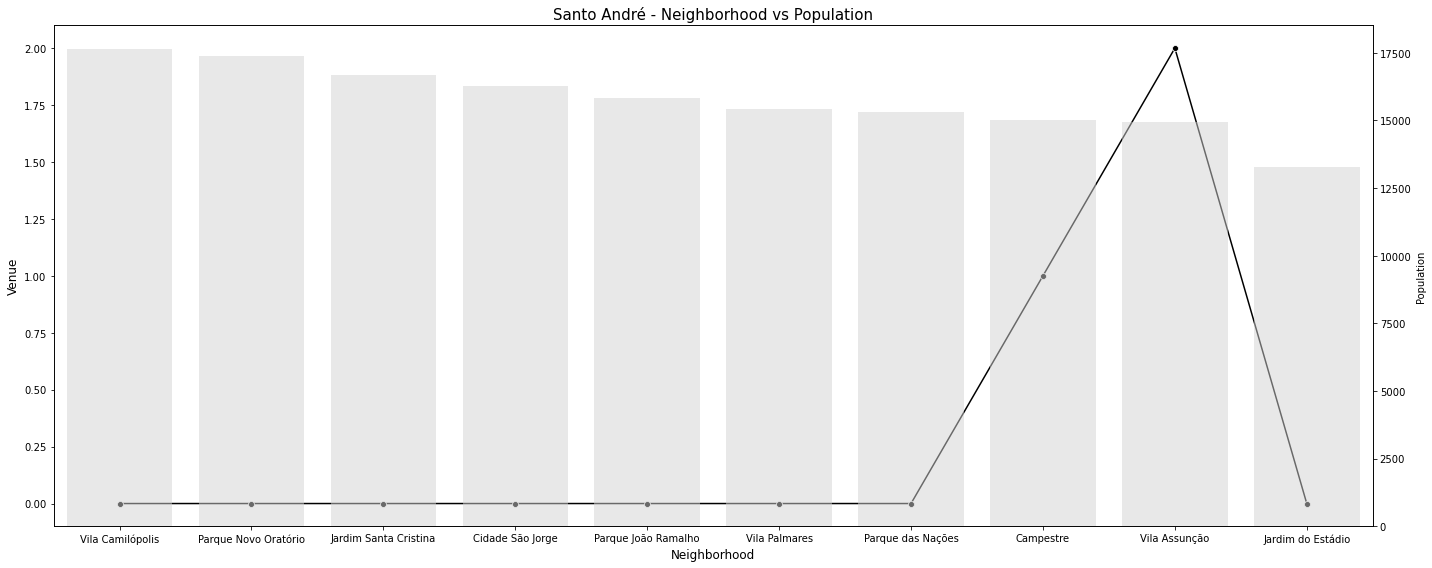

In [21]:
#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(20,8))
#criando o gráfico de barras
sns.lineplot(data=sta_top10['Venue'], ax=ax, marker='o', sort=True, color='black')
ax1 = ax.twinx()
sns.barplot(data=sta_top10, x='Neighborhood', y='Population',  alpha=0.5, ax=ax1, color='lightgray')
#adicionando título
ax.set_title("Santo André - Neighborhood vs Population", fontdict={'fontsize':15})
#mudando nome e tamanho do label x
ax.set_xlabel('Neighborhood', fontdict={'fontsize':12})
#mudando nome e tamanho do label y
ax.set_ylabel('Venue', fontdict={'fontsize':12})
#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=10)
#otimizar espaço da figure
fig.tight_layout();

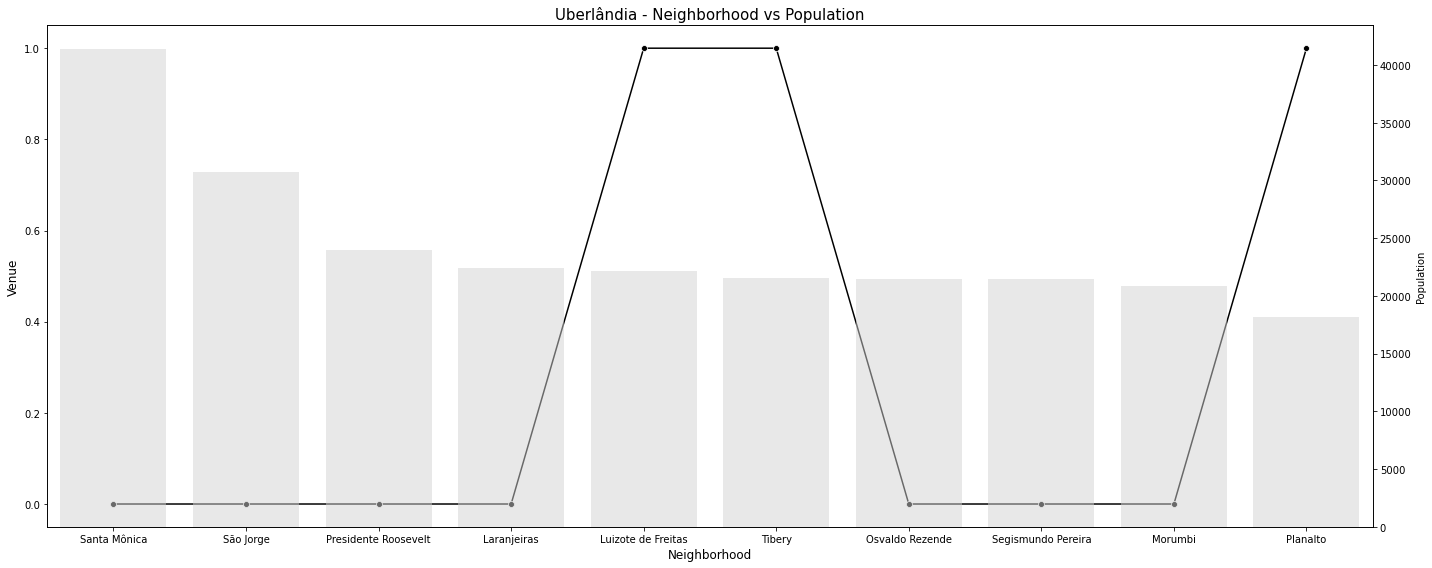

In [23]:
#criando uma figure, axes, alterando tamanho

fig, ax = plt.subplots(figsize=(20,8))
#criando o gráfico de barras
sns.lineplot(data=uber_top10['Venue'], ax=ax, marker='o', sort=True, color='black')
ax1 = ax.twinx()
sns.barplot(data=uber_top10, x='Neighborhood', y='Population',  alpha=0.5, ax=ax1, color='lightgray')
#adicionando título
ax.set_title("Uberlândia - Neighborhood vs Population", fontdict={'fontsize':15})
#mudando nome e tamanho do label x
ax.set_xlabel('Neighborhood', fontdict={'fontsize':12})
#mudando nome e tamanho do label y
ax.set_ylabel('Venue', fontdict={'fontsize':12})
#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=10)
#otimizar espaço da figure
fig.tight_layout();

In [27]:
for lat, lng, label in zip(sta_venues['Venue Latitude'], sta_venues['Venue Longitude'], sta_venues['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sta)  
    
map_sta

In [29]:
for lat, lng, label in zip(uber_venues['Venue Latitude'], uber_venues['Venue Longitude'], uber_venues['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_uber)  
    
map_uber